In [1]:
!pip install biosppy

In [22]:
import biosppy
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Função para extrair características de uma janela de 10 segundos
def extract_features_from_window(signal, sampling_rate):
    window_size = 10  # em segundos
    num_samples = window_size * sampling_rate
    num_windows = len(signal) // num_samples
    
    features_list = []
    
    for i in range(num_windows):
        start_idx = i * num_samples
        end_idx = start_idx + num_samples
        window_signal = signal[start_idx:end_idx]
        
        # Extração de características usando a função correta
        ecg_result = biosppy.signals.ecg.ecg(signal=window_signal, sampling_rate=sampling_rate, show=False)
        
        # Features
        window_features = {
            'mean_rr': np.mean(ecg_result['heart_rate']),
            'std_rr': np.std(ecg_result['heart_rate']),
            'rmssd': np.sqrt(np.mean(np.square(np.diff(ecg_result['heart_rate'])))),
            'pnn50': sum(np.diff(ecg_result['heart_rate']) > 50) / len(ecg_result['heart_rate']) * 100
        }
        features_list.append(window_features)
    
    return features_list

# Gerando um sinal de exemplo (substitua isso pelos seus dados reais)
np.random.seed(42)
fs = 1000  # taxa de amostragem (Hz)
t = np.arange(0, 600, 1/fs)  # 10 minutos de sinal
ecg_signal = 0.5 * np.sin(2 * np.pi * 1.0 * t) + 0.2 * np.sin(2 * np.pi * 2.5 * t) + 0.1 * np.random.randn(len(t))

# Gerando rótulos de qualidade (0 para ruim, 1 para bom) para cada janela de 10 segundos
window_labels = np.random.choice([0, 1], size=len(t) // (10 * fs))

# Extraindo características de cada janela
window_features = extract_features_from_window(ecg_signal, fs)

# Transformando as características em um formato adequado para o modelo
X = np.array([list(window.values()) for window in window_features])
y = np.array(window_labels)

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo de Árvore de Decisão
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Realizando previsões no conjunto de teste
predictions = model.predict(X_test)
print(predictions.shape)

(12,)


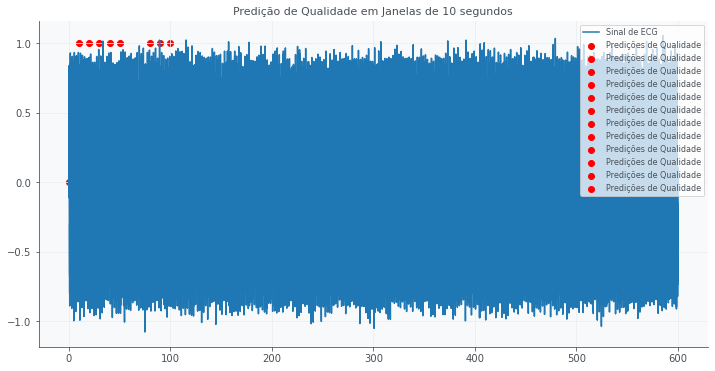

In [19]:
# Criando um vetor de índices correspondentes ao início de cada janela
window_indices = np.arange(0, len(t), 10 * fs)[:len(predictions)]

# Plotando o resultado
plt.figure(figsize=(12, 6))
plt.plot(t, ecg_signal, label='Sinal de ECG')

# Plotando as predições de qualidade no local apropriado
for idx, pred in zip(window_indices, predictions):
    plt.scatter(t[idx], pred, c='r', marker='o', label='Predições de Qualidade')

plt.legend()
plt.title('Predição de Qualidade em Janelas de 10 segundos')
plt.show()

6


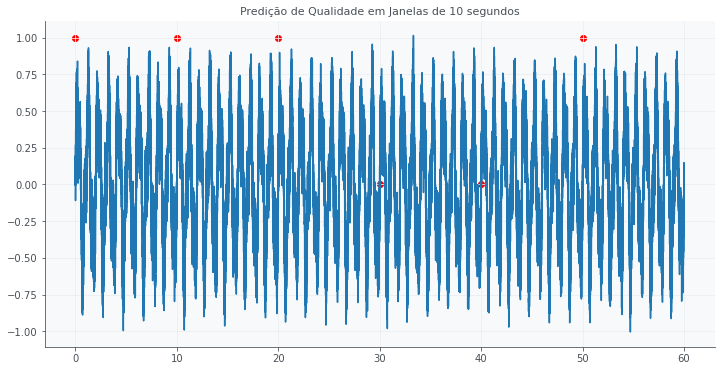

In [32]:
import biosppy
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Função para extrair características de uma janela de 10 segundos
def extract_features_from_window(signal, sampling_rate):
    window_size = 10  # em segundos
    num_samples = window_size * sampling_rate
    num_windows = len(signal) // num_samples
    
    features_list = []
    
    for i in range(num_windows):
        start_idx = i * num_samples
        end_idx = start_idx + num_samples
        window_signal = signal[start_idx:end_idx]
        
        # Extração de características usando a função correta
        ecg_result = biosppy.signals.ecg.ecg(signal=window_signal, sampling_rate=sampling_rate, show=False)
        
        # Features
        window_features = {
            'mean_rr': np.mean(ecg_result['heart_rate']),
            'std_rr': np.std(ecg_result['heart_rate']),
            'rmssd': np.sqrt(np.mean(np.square(np.diff(ecg_result['heart_rate'])))),
            'pnn50': sum(np.diff(ecg_result['heart_rate']) > 50) / len(ecg_result['heart_rate']) * 100
        }
        features_list.append(window_features)
    
    return features_list

# Gerando um sinal de exemplo para 1 minuto (substitua isso pelos seus dados reais)
np.random.seed(42)
fs = 1000  # taxa de amostragem (Hz)
t = np.arange(0, 60, 1/fs)  # 1 minuto de sinal
ecg_signal = 0.5 * np.sin(2 * np.pi * 1.0 * t) + 0.2 * np.sin(2 * np.pi * 2.5 * t) + 0.1 * np.random.randn(len(t))

# Gerando rótulos de qualidade (0 para ruim, 1 para bom) para cada janela de 10 segundos
window_labels = np.random.choice([0, 1], size=len(t) // (10 * fs))

# Extraindo características de cada janela
window_features = extract_features_from_window(ecg_signal, fs)

# Transformando as características em um formato adequado para o modelo
X = np.array([list(window.values()) for window in window_features])
y = np.array(window_labels)

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo de Árvore de Decisão
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Realizando previsões no conjunto de teste
predictions = model.predict(X_test)

# Previsões no sinal inteiro
predictions_full = model.predict(X)

# Criando um vetor de índices correspondentes ao início de cada janela
window_indices = np.arange(0, len(t), 10 * fs)[:len(predictions_full)]

# Plotando o resultado
plt.figure(figsize=(12, 6))
plt.plot(t, ecg_signal, label='Sinal de ECG')

# Plotando as predições de qualidade no local apropriado
for idx, pred in zip(window_indices, predictions_full):
    plt.scatter(t[idx], pred, c='r', marker='o', label='Predições de Qualidade')

#plt.legend()
plt.title('Predição de Qualidade em Janelas de 10 segundos')
plt.show()
